<h1>Predicting Readmission of a Patient</h1>

In this problem we are provided with a sampled dataset from the <a href='https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008'>Datatset</a>. Using this dataset we have provide the insights like :<br>
<ul>
    <li>Probabilities of Readmission of patient</li>
    <li>Finding the effect of the the features like :</li>
    <ul>
        <li>Age</li>
        <li>Gender</li>
        <li>Diagnosis 1 + Diagnosis 2 + Diagnosis 3</li>
    </ul>
</ul>

First of all we will import all the dependencies which are necessary for our data analysis :

In [113]:
import numpy as np           #Data manipulation 
import pandas as pd           #Dataframe and data analysis
import seaborn as sns         #library for graphs
import matplotlib.pyplot as plt  # ibrary for graphs and figures
from tqdm import tqdm       #to see the progress of a cell      
%matplotlib inline

In [114]:
#Import the dataset

data = pd.read_csv('diabetic_data_sampled.csv')

Let's get a quick look at the features and their information

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 51 columns):
Unnamed: 0                  50000 non-null int64
encounter_id                50000 non-null int64
patient_nbr                 50000 non-null int64
race                        50000 non-null object
gender                      50000 non-null object
age                         50000 non-null object
weight                      50000 non-null object
admission_type_id           50000 non-null int64
discharge_disposition_id    50000 non-null int64
admission_source_id         50000 non-null int64
time_in_hospital            50000 non-null int64
payer_code                  50000 non-null object
medical_specialty           50000 non-null object
num_lab_procedures          50000 non-null int64
num_procedures              50000 non-null int64
num_medications             50000 non-null int64
number_outpatient           50000 non-null int64
number_emergency            50000 non-null int64
num

Now let's see have a look at the first five instances of the dataset

In [116]:
data.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,60753,170043306,43951986,Caucasian,Male,[50-60),?,3,1,1,...,No,No,No,No,No,No,No,No,Yes,NO
1,84068,264404190,41103801,Caucasian,Female,[50-60),?,1,1,7,...,No,Down,No,No,No,No,No,Ch,Yes,>30
2,58710,166069038,85378401,Caucasian,Female,[80-90),?,1,6,1,...,No,No,No,No,No,No,No,No,Yes,<30
3,24001,81704184,21255471,Caucasian,Female,[50-60),?,2,1,1,...,No,No,No,No,No,No,No,No,Yes,<30
4,20797,72981234,8641071,Caucasian,Female,[80-90),?,1,1,7,...,No,No,No,No,No,No,No,No,No,NO


In [117]:
#Shape of the dataset
data.shape

(50000, 51)

In this dataset the <p></p> feature is our target variable. it contains 3 values i.e. '<30' , '>30', 'NO'.

1. '<30' means the patient is readmitted within 30 days of discharge.
2. '>30' means the patient is readmitted after the 30 days of discharge.
3. 'NO' means the patient is never readmitted.

Let's make a plot to visualize this data.

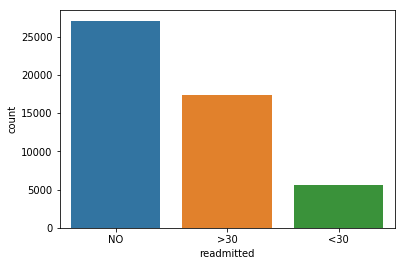

In [118]:
sns.countplot(x=data['readmitted'])

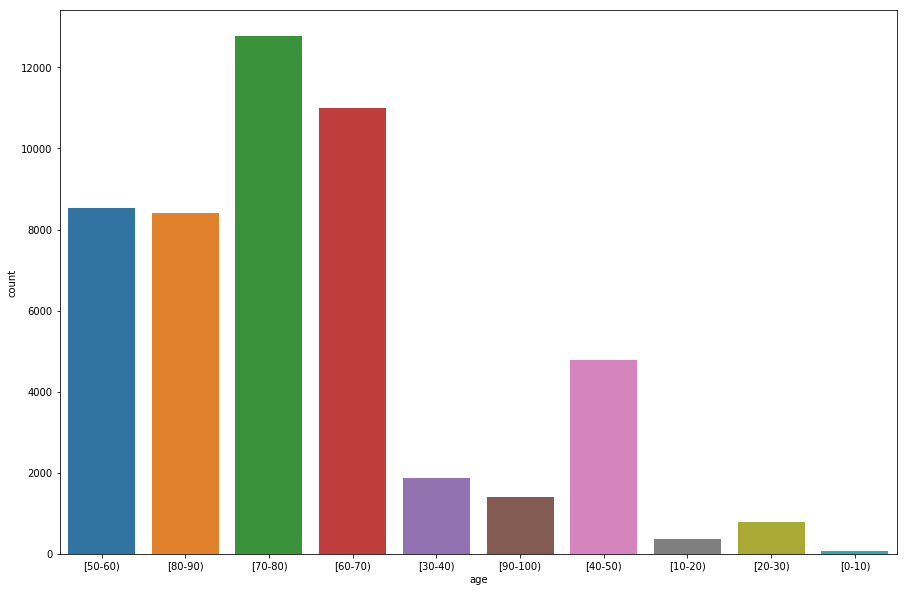

In [120]:
#Plot for the age variation in the dataset
plt.figure(figsize=(15,10))
sns.countplot(x=data['age'])

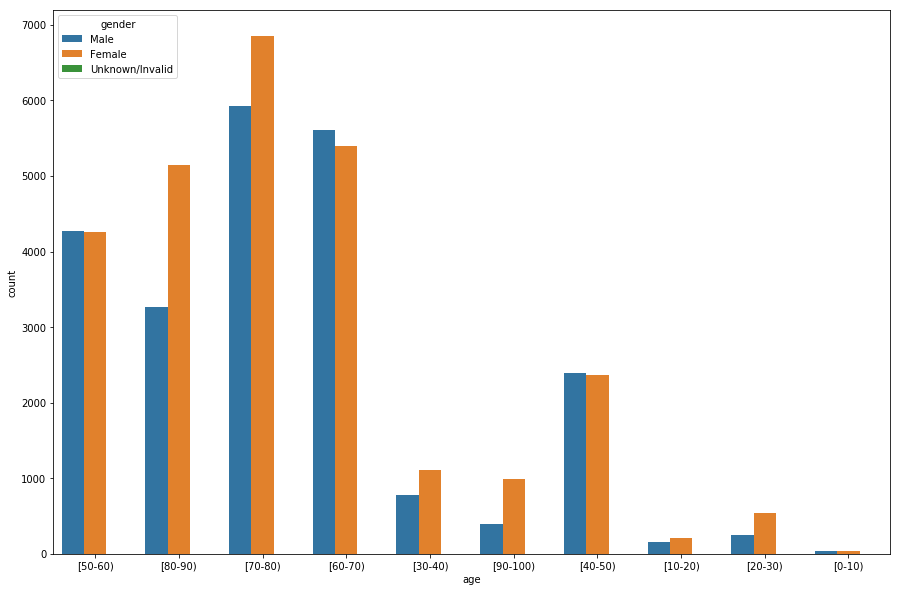

In [122]:
#Plot for the no. of males and females of each age group
plt.figure(figsize=(15,10))
sns.countplot(x=data['age'], hue=data['gender'])

lets check the columns of the dataset 

In [7]:
data.columns

Index(['Unnamed: 0', 'encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'weight', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'payer_code',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

<h2> EDA and Feature Engineering </h2>

The dataset is a combination is a of categorical and numerical features. From above we can see that 'Unnamed: 0' , 'encounter_id' and 'patient_nbr' are just identifiers so we don't need them for our analysis. let's drop these columns.

In [8]:
data = data.drop(['Unnamed: 0', 'encounter_id', 'patient_nbr'], axis=1)

There are null values represented by the '?' so we will replace them will NaN

In [9]:
data = data.replace('?', np.nan)

In [10]:
null_percent = data.isnull().sum()/data.shape[0]*100
null_values = pd.DataFrame(null_percent, index=data.columns, columns=['%age of null values'])
null_values

,%age of null values
race,2.284
gender,0.000
age,0.000
weight,96.852
admission_type_id,0.000
discharge_disposition_id,0.000
admission_source_id,0.000
time_in_hospital,0.000
payer_code,39.852
medical_specialty,49.128


Now we can see weight, payer_code and medical_specialty have high percentages of null values so it's better to drop these columns and we will also remove those instances which have any null values

In [11]:
data = data.drop(['weight', 'payer_code', 'medical_specialty'], axis=1)
data = data.dropna()

In [12]:
#lets check the shape of data again
data.shape

(48152, 45)

Let's get those columns which have only one value in them 

In [13]:
unique_values= {}
cols_with_one = []
for i in data.columns:
    uv = data[i].unique()
    if(len(uv) < 2):
        unique_values[i] = uv
        cols_with_one.append(i)
        

unique_values

{'acetohexamide': array(['No'], dtype=object),
 'examide': array(['No'], dtype=object),
 'citoglipton': array(['No'], dtype=object),
 'metformin-rosiglitazone': array(['No'], dtype=object),
 'metformin-pioglitazone': array(['No'], dtype=object)}

In [14]:
#We will drop these features from our dataset 
data = data.drop(cols_with_one, axis=1)

In [15]:
#Let's have a look at the Age 
data['age'].value_counts()

[70-80)     12397
[60-70)     10658
[50-60)      8250
[80-90)      8179
[40-50)      4560
[30-40)      1772
[90-100)     1351
[20-30)       697
[10-20)       259
[0-10)         29
Name: age, dtype: int64

As we can see most of the people belong to 70-80 and 60-70 age groups. We will reduce the age categories in the dataset to get a better persepective so we will 0-10, 10-20, 20-30, 30-40 in a single group i.e 0-40 and do same with 80-90 and 90-100

In [16]:
data['age'] = pd.Series(['[0-40)' if val in ['[0-10)', '[10-20)', '[20-30)', '[30-40)'] else val 
                         for val in data['age']], index=data.index)
data['age'] = pd.Series(['[80-100)' if val in ['[80-90)', '[90-100)'] else val 
                         for val in data['age']], index=data.index)

data['age'].value_counts()

[70-80)     12397
[60-70)     10658
[80-100)     9530
[50-60)      8250
[40-50)      4560
[0-40)       2757
Name: age, dtype: int64

Let's check the percentages of the values in the medicinal columns

In [17]:
med_cols = data.columns[19:37]

In [18]:
data_per = []
for i in med_cols:
    per = data[i].value_counts()
    data_per.append(per/data.shape[0]*100)

In [19]:
print(data_per)

[No        80.499252
Steady    17.930719
Up         1.007227
Down       0.562801
Name: metformin, dtype: float64, No        98.340671
Steady     1.484881
Up         0.118375
Down       0.056072
Name: repaglinide, dtype: float64, No        99.268982
Steady     0.693637
Up         0.022844
Down       0.014537
Name: nateglinide, dtype: float64, No        99.929390
Steady     0.068533
Up         0.002077
Name: chlorpropamide, dtype: float64, No        94.938943
Steady     4.539791
Up         0.338511
Down       0.182755
Name: glimepiride, dtype: float64, No        87.616298
Steady    11.052500
Up         0.772554
Down       0.558648
Name: glipizide, dtype: float64, No        89.539375
Steady     9.087888
Up         0.836933
Down       0.535803
Name: glyburide, dtype: float64, No        99.979232
Steady     0.020768
Name: tolbutamide, dtype: float64, No        92.774963
Steady     6.880296
Up         0.230520
Down       0.114222
Name: pioglitazone, dtype: float64, No        93.672122
Steady

As we can see there are high occurences of a single value analysis will be biased and will not help. So we will remove all the features except Insulin.

In [20]:
insulin_data = data['insulin']
data = data.drop(med_cols, axis=1)
data = pd.concat([data, insulin_data], axis=1)

Now we will analyse the diagnosis columns namely diag_1, diag_2, diag_3 which corresponds to the Primary diagnosis, Secondary diagnosis, Additional Secondary diagnosis. Some points to know about them are :

1. These are the categorical features.
2. They have high no. of unique values which are around 600 to 800 so it will be a difficult task to encode them.
3. These are one of the icd9 codes which corresponds to a particular category which can be seen <a href='https://www.hindawi.com/journals/bmri/2014/781670/tab2/'>here</a>

First lets make the copies for these features in the data :

In [21]:
data['diag1_cat'] = data['diag_1'].copy()
data['diag2_cat'] = data['diag_2'].copy()
data['diag3_cat'] = data['diag_3'].copy()

The codes which contain E or V belongs to the other category so we will encode them as 0

In [22]:
#converting to category 0 i.e. diagnosis containing E and V
data.loc[data['diag_1'].str.contains('E'), ['diag1_cat']] = '0'
data.loc[data['diag_1'].str.contains('V'), ['diag1_cat']] = '0'
data.loc[data['diag_2'].str.contains('E'), ['diag2_cat']] = '0'
data.loc[data['diag_2'].str.contains('V'), ['diag2_cat']] = '0'
data.loc[data['diag_3'].str.contains('E'), ['diag3_cat']] = '0'
data.loc[data['diag_3'].str.contains('V'), ['diag3_cat']] = '0'

Now to deal with other categories we will make a function 

In [23]:
# Now for other categories
diagnosis_cols = ['diag1_cat', 'diag2_cat', 'diag3_cat']

def diagnosis_cat(i):
    for index, row in data.iterrows():
        if(np.float64(row[i]) >= 390 and np.float64(row[i]) <= 459) or (np.float64(row[i]) == 785):
            data.loc[index, i] = '1'
        elif(np.float64(row[i]) >= 460 and np.float64(row[i]) <= 519) or (np.float64(row[i]) == 786):
            data.loc[index, i] = '2'
        elif(np.float64(row[i]) >= 520 and np.float64(row[i]) <= 579) or (np.float64(row[i]) == 787):
            data.loc[index, i] = '3'
        elif(np.float64(row[i]) >= 800 and np.float64(row[i]) <= 999):
            data.loc[index, i] = '5'
        elif(np.float64(row[i]) >= 710 and np.float64(row[i]) <= 739):
            data.loc[index, i] = '6'
        elif(np.float64(row[i]) >= 580 and np.float64(row[i]) <= 629) or (np.float64(row[i]) == 788):
            data.loc[index, i] = '7'
        elif(np.float64(row[i]) >= 140 and np.float64(row[i]) <= 239):
            data.loc[index, i] = '8'
        elif(np.floor(np.float64(row[i])) == 250):
            data.loc[index, i] = '4'
        else:
            data.loc[index, i] = '0'

In [24]:
for i in tqdm(diagnosis_cols):
    diagnosis_cat(i)
    print('Diagnosis done :', i)

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Diagnosis done : diag1_cat


 33%|████████████████████████████                                                        | 1/3 [01:37<03:15, 97.54s/it]

Diagnosis done : diag2_cat


 67%|████████████████████████████████████████████████████████                            | 2/3 [03:18<01:38, 98.48s/it]

Diagnosis done : diag3_cat


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [04:59<00:00, 99.34s/it]


Now encoding of the diagnosis columns is done , let's make some plots to gain insights about diagnosis types:

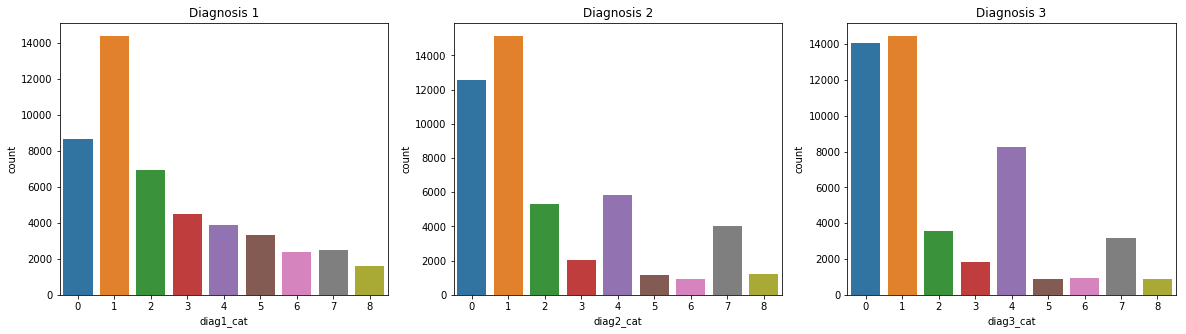

In [25]:
plt.figure(figsize=(20,5))
n=0
for i,j in zip([data['diag1_cat'],data['diag2_cat'], data['diag3_cat']] , ['Diagnosis 1', 'Diagnosis 2','Diagnosis 3']):
    n += 1
    plt.subplot(1, 3, n)
    sns.countplot(x=i)
    plt.title(j)
plt.show()

In [26]:
#Drop old diagnosis columns
data1 = data.drop(['diag_1', 'diag_2', 'diag_3'], axis=1)

Let's have a look at the admission_type_id column , each id maps to a particular type of admission emargency , urgent etc. (Full details are available in the id_mappings file of original dataset). Some of these id's are of same type like emergency , urgent and trauma center maps to same category.

So we will map similar id's togather

In [27]:
# id 1,2 and 7 are same and 5,6,8 are also same so
data1['admission_type_id'] = data1['admission_type_id'].replace(2,1)
data1['admission_type_id'] = data1['admission_type_id'].replace(7,1)
data1['admission_type_id'] = data1['admission_type_id'].replace(6,5)
data1['admission_type_id'] = data1['admission_type_id'].replace(8,5)

Let's do same thing for the discharge disposition id 

In [28]:
data1['discharge_disposition_id'] = data1['discharge_disposition_id'].replace(25,18) #not mapped data
data1['discharge_disposition_id'] = data1['discharge_disposition_id'].replace(19,11)  #expired
data1['discharge_disposition_id'] = data1['discharge_disposition_id'].replace(20,11)  #expired

Now let's consider our target variable i.e. readmitted. It has three classes namely '<30' , '>30', 'NO'. Since '>30' is not clear and does not give a clear explanation about the time after which the patient was readmitted.

It could be in years which is close to never readmitted so we will consider our problem to be binary i.e. we will predict whether the patient was readmitted in the 30 or not.

So we will encode '<30'  as 1 as it is our main variable and rest as 0 

In [29]:
target = {'<30': 1, '>30': 0, 'NO': 0}

data1['readmitted'] = data1['readmitted'].map(target).astype('int')

data1['readmitted'].value_counts()

0    42739
1     5413
Name: readmitted, dtype: int64

As we can our data is facing a class imbalance problem so we will deal with problem later.


Now we will also encode the change and DiabetesMeds columns

In [30]:
change = {'Ch': 1, 'No': 0}

data1['change'] = data1['change'].map(change).astype('int')

data1['change'].value_counts()

0    25958
1    22194
Name: change, dtype: int64

In [31]:
data1['diabetesMed'] = data1['diabetesMed'].replace('Yes',1)
data1['diabetesMed'] = data1['diabetesMed'].replace('No',0)

data1['diabetesMed'].value_counts()

1    36912
0    11240
Name: diabetesMed, dtype: int64

Now we will saperate out the integer type columns and categorical columns so that we can one hot encode the categorical columns.

In [32]:
cols_int = []
cols_cat = []
for i in data1.columns:
    if(data1[i].dtype == 'int64') or (data1[i].dtype == 'int32'):
        cols_int.append(i)
    else:
        cols_cat.append(i)

In [33]:
#Integer columns
cols_int

['admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'change',
 'diabetesMed',
 'readmitted']

In [34]:
#categorical columns
cols_cat

['race',
 'gender',
 'age',
 'max_glu_serum',
 'A1Cresult',
 'insulin',
 'diag1_cat',
 'diag2_cat',
 'diag3_cat']

Let's create one hot encoding of the categorical columns and concat them with the integer columns

In [35]:
one_hot_encode = pd.get_dummies(data1[cols_cat])
one_hot_encode.head()

,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,age_[0-40),age_[40-50),age_[50-60),...,diag2_cat_8,diag3_cat_0,diag3_cat_1,diag3_cat_2,diag3_cat_3,diag3_cat_4,diag3_cat_5,diag3_cat_6,diag3_cat_7,diag3_cat_8
0,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [36]:
data2 = pd.concat([data1[cols_int], one_hot_encode], axis=1)

In [37]:
data2.shape

(48152, 66)

In [38]:
#export it as a new datafile 
data2.to_csv('diabetes_preprocessed.csv', sep=',', index=False)

Here our Feature engineering and EDA has ended now we will prepare our data for machine learning models and divide it in training and testing sets

<h2>Making Data ready for the ML Algorithms</h2>

In [40]:
#lets import our preprocessed data
data = pd.read_csv('diabetes_preprocessed.csv')

data.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,diag2_cat_8,diag3_cat_0,diag3_cat_1,diag3_cat_2,diag3_cat_3,diag3_cat_4,diag3_cat_5,diag3_cat_6,diag3_cat_7,diag3_cat_8
0,3,1,1,14,41,0,11,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,1,7,2,30,0,12,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,6,1,5,66,0,22,1,0,2,...,0,0,0,0,0,0,0,1,0,0
3,1,1,1,3,63,0,8,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,1,7,5,40,0,6,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [41]:
#saperate our data and our target variable
y = data['readmitted']
X = data.drop('readmitted', axis=1)

Now we will divide our data in training and test sets. Here we have chosen 80% training set and 20% test set.

In [44]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state = 22, test_size = 0.2)

We seen previously that there are integer columns in our dataset. As integer data may vary to different ranges so we should normalize our data to a particular range to speed up the calculations. The algorithms which use euclidean distances are sensitive data magnitude like KNN but linear models and tree based models are not affected by the normalization.

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

xtrain_sc = scaler.fit_transform(xtrain)
xtest_sc = scaler.fit_transform(xtest)

xtrain_sc = pd.DataFrame(xtrain_sc, columns=X.columns)
xtest_sc = pd.DataFrame(xtest_sc, columns=X.columns)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Let's have a look at the distribution of target variables in our testing and training sets.

In [46]:
print('Train Samples')
pd.Series(ytrain).value_counts()

Train Samples


0    34230
1     4291
Name: readmitted, dtype: int64

In [47]:
print('Test Samples')
pd.Series(ytest).value_counts()

Test Samples


0    8509
1    1122
Name: readmitted, dtype: int64

<h2>Applying Machine learning Algrorithms & Model Evaluations </h2>

Now we have chose 3 algorithms for the analysis of our data:
 
 1. Logistic regression
 2. Decision Tree
 3. Random Forest
 
Since our data is facing the class imbalanced problem, accuracy_score() metric will not be suitable for our model evaluation. So we will use other metrics like Precision score, Recall score, F1_score , AUC, classification report and confusion metrics.
 
For all this make a helper function to generate all these metrics and one more helper function to generate plots of ROC curve

In [74]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve

def scores(predicted, actual):
    print('Precision Score : ', precision_score(actual, predicted))
    print('Recall Score : ', recall_score(actual, predicted))
    print('f1 Score : ', f1_score(actual, predicted))
    print('AUC : ',roc_auc_score(actual, predicted))
    print('Classification Report : ', classification_report(actual, predicted))
    print('Confusion matrix : ', confusion_matrix(actual, predicted))

In [75]:
def gen_roc_curve(predicted_prob, actual, title):
    fpr, tpr, thres = roc_curve(actual, predicted_prob)
    plt.plot([0, 1], [0, 1])
    # plot the roc curve for the model
    plt.plot(fpr, tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title(title)
    # show the plo1
    plt.show()

<h3>Logistic regression</h3>

In [52]:
#Logistic regression 

from sklearn.linear_model import LogisticRegression

lr= LogisticRegression(solver='lbfgs',class_weight='balanced', random_state=22)

lr.fit(xtrain_sc, ytrain)

lr.score(xtrain_sc, ytrain)

0.6564730925988422

In [93]:
lr_acc = lr.score(xtest_sc, ytest)
lr_acc

0.6537223548956494

In [55]:
lr_pred = lr.predict(xtest_sc)
scores(lr_pred, ytest)

Precision Score :  0.1746545133784181
Recall Score :  0.5294117647058824
f1 Score :  0.2626575281892549
AUC :  0.5997628808251471
Classification Report :                precision    recall  f1-score   support

           0       0.92      0.67      0.77      8509
           1       0.17      0.53      0.26      1122

   micro avg       0.65      0.65      0.65      9631
   macro avg       0.54      0.60      0.52      9631
weighted avg       0.83      0.65      0.71      9631

Confusion matrix :  [[5702 2807]
 [ 528  594]]


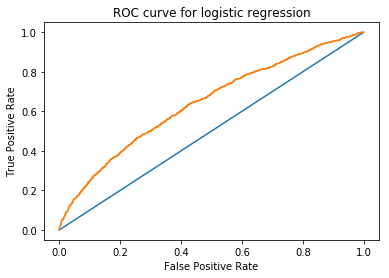

In [76]:
probs_lr = lr.predict_proba(xtest_sc)
probs_lr = probs_lr[:, 1]
gen_roc_curve(probs_lr, ytest, title= 'ROC curve for logistic regression')

<h3>Decision Tree</h3>

In [82]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

dte = DecisionTreeClassifier(max_depth=10,class_weight='balanced', random_state=22)

dte.fit(xtrain_sc, ytrain)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=22,
            splitter='best')

In [83]:
dte.score(xtrain_sc, ytrain)

0.6308766646764102

In [94]:
dte_acc = dte.score(xtest_sc, ytest)
dte_acc

0.5956806146817568

In [85]:
dte_pred = dte.predict(xtest_sc)
scores(dte_pred, ytest)

Precision Score :  0.1587887740029542
Recall Score :  0.5748663101604278
f1 Score :  0.2488425925925926
AUC :  0.5866457535054107
Classification Report :                precision    recall  f1-score   support

           0       0.91      0.60      0.72      8509
           1       0.16      0.57      0.25      1122

   micro avg       0.60      0.60      0.60      9631
   macro avg       0.54      0.59      0.49      9631
weighted avg       0.83      0.60      0.67      9631

Confusion matrix :  [[5092 3417]
 [ 477  645]]


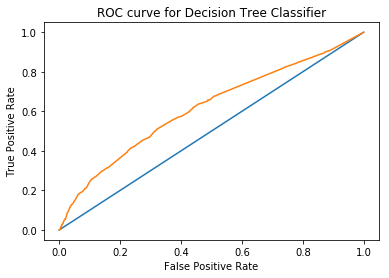

In [86]:
probs_dt = dte.predict_proba(xtest_sc)
probs_dt = probs_dt[:, 1]
gen_roc_curve(probs_dt, ytest, title= 'ROC curve for Decision Tree Classifier')

<h3> Random Forest Classifier </h3>

In [88]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(class_weight='balanced', random_state=22, max_depth=10, n_estimators=100)

rf1.fit(xtrain_sc,ytrain)

rf1.score(xtrain_sc, ytrain)

0.7787181018145947

In [95]:
rf_acc = rf1.score(xtest_sc, ytest)
rf_acc

0.73606063752466

In [91]:
test_pred = rf1.predict(xtest_sc)

scores(test_pred, ytest)

Precision Score :  0.20016891891891891
Recall Score :  0.42245989304812837
f1 Score :  0.27163323782234955
AUC :  0.5999360224436786
Classification Report :                precision    recall  f1-score   support

           0       0.91      0.78      0.84      8509
           1       0.20      0.42      0.27      1122

   micro avg       0.74      0.74      0.74      9631
   macro avg       0.56      0.60      0.56      9631
weighted avg       0.83      0.74      0.77      9631

Confusion matrix :  [[6615 1894]
 [ 648  474]]


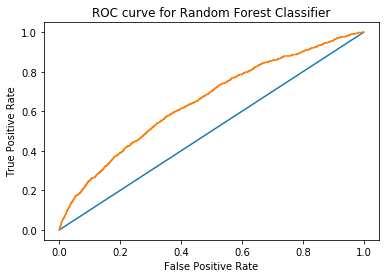

In [92]:
probs_rf = rf1.predict_proba(xtest_sc)
probs_rf = probs_rf[:, 1]
gen_roc_curve(probs_rf, ytest, title= 'ROC curve for Random Forest Classifier')

Let's draw all the ROC curves in one frame

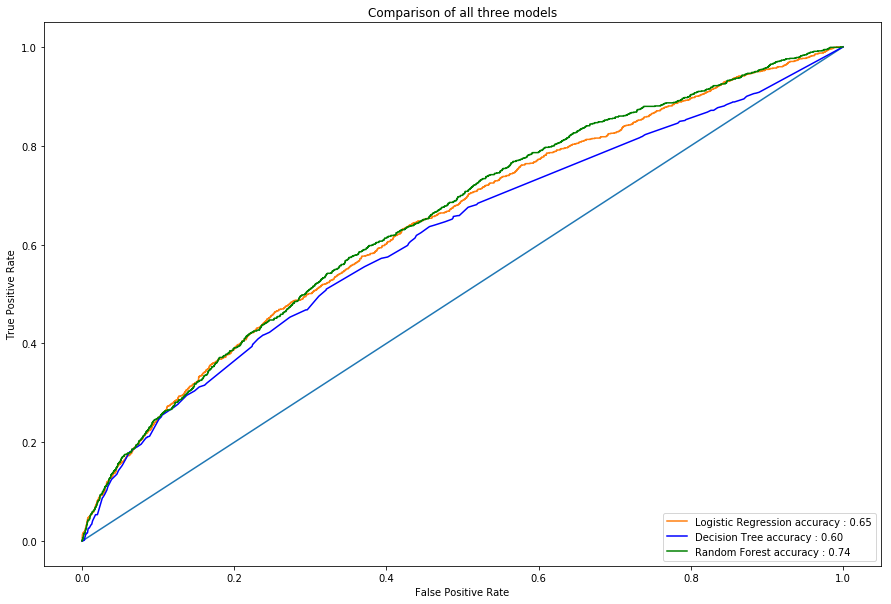

In [102]:
plt.figure(figsize=(15,10))

fpr_lr, tpr_lr, thres_lr = roc_curve(ytest, probs_lr)
fpr_dt, tpr_dt, thres_dt = roc_curve(ytest, probs_dt)
fpr_rf, tpr_rf, thres_rf = roc_curve(ytest, probs_rf)

plt.plot([0, 1], [0, 1])
# plot the roc curve for the model
plt.plot(fpr_lr, tpr_lr, label = 'Logistic Regression accuracy : {0:.2f}'.format(lr_acc))
plt.plot(fpr_dt, tpr_dt, label = 'Decision Tree accuracy : {0:.2f}'.format(dte_acc), color = 'blue')
plt.plot(fpr_rf, tpr_rf, label = 'Random Forest accuracy : {0:.2f}'.format(rf_acc), color='green')

plt.legend(loc = 'lower right')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Comparison of all three models')
# show the plo1
plt.show()

As we can see from the above figure that Random Forest is perfroming better than other two and has higher test accuracy and Random forest also has higher f1 score than the other two 

<h2>Important Feature of the models</h2>

Let's have a look at the feature importance of each of the model 

In [107]:
lr_imp_feature = pd.DataFrame(lr.coef_[0], index=xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
lr_imp_feature

,importance
number_inpatient,0.335696
discharge_disposition_id,0.144731
number_diagnoses,0.099321
diabetesMed,0.073000
time_in_hospital,0.065550
number_emergency,0.062372
diag1_cat_1,0.051340
diag2_cat_4,0.047759
insulin_Down,0.045843
diag2_cat_8,0.045637


In [111]:
dte_imp_features = pd.DataFrame(dte.feature_importances_, index=xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)

dte_imp_features

,importance
number_inpatient,0.213720
discharge_disposition_id,0.162337
num_medications,0.084071
num_lab_procedures,0.079092
time_in_hospital,0.052129
number_diagnoses,0.030951
num_procedures,0.025234
admission_source_id,0.019648
number_emergency,0.018128
diag2_cat_2,0.016709


In [112]:
most_imp_features_rf = pd.DataFrame(rf1.feature_importances_, index=xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)

most_imp_features_rf

,importance
number_inpatient,0.174747
discharge_disposition_id,0.095959
num_medications,0.068750
num_lab_procedures,0.068366
time_in_hospital,0.054849
number_diagnoses,0.040277
number_emergency,0.035070
num_procedures,0.031930
number_outpatient,0.021623
admission_source_id,0.020115


<h2>Conclusions </h2>

We can draw several conclusions from the features importance of the three models :

   1. number_inpatient and discharge_disposition_id are the most important features of the data to determine whether a person will get readmitted in the hospital within 30 days. 
   
   number_inpatient  = number of inpatient visit of the patient in the year preceding the encounter
   
   discharge_disposition_id = id's which corresponds to the place where patient was discharged like other hospital, discharge to home etc.
   
   
  2. If we take a look at the importance of age, we find out that age falling in range 80-100, 70-80 and 50-60 correspond more to the readmission of the patient in 30 days.
   
   
  3. If we look at the importance of gender , we find that they doen't contribute much towards the positive class but if look at individuals then we find out that males have slightly more tendency of readmission than females in 30 days.
  
  
  4. Let's talk about Diagnosis which include primary , secondary and additional secondary. Primary(diag_1) and Secondary(diag_2) diagnosis are more important than the additional secondary, so we can say that if primary and secondary diagnosis are not proper than people have higher probability of getting readmitted. 
  
      if we talk about categories in diagnosis then disease of circulatory (category 1), disease of respiratory system (category 2) and Diabetic Mellitus (category 4) are most important in diagnosis. 
      
      
  5. Readmission of a patient also depends upon the family information, and weight of the patient (which were highly missing ithis dataset).
  
 
  6. Overall if we see,  the hospital should consider the following things like number of procedures, primary medication, number of diagnosis to minimize the readmissions of the patients.